In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
dados=pd.read_csv('MY2022 Fuel Consumption Ratings.csv')

In [13]:
dados.head(10)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
5,2022,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,AS10,Z,11.3,8.1,9.8,29,231,5,7
6,2022,Acura,TLX Type S,Compact,3.0,6,AS10,Z,12.3,9.4,11.0,26,256,5,5
7,2022,Acura,TLX Type S (Performance Tire),Compact,3.0,6,AS10,Z,12.3,9.8,11.2,25,261,4,5
8,2022,Alfa Romeo,Giulia,Mid-size,2.0,4,A8,Z,10.0,7.2,8.7,32,205,6,3
9,2022,Alfa Romeo,Giulia AWD,Mid-size,2.0,4,A8,Z,10.5,7.7,9.2,31,217,5,3


In [14]:
#dados.groupby('Fuel Type').sum()

## Avaliando as correlações preliminares

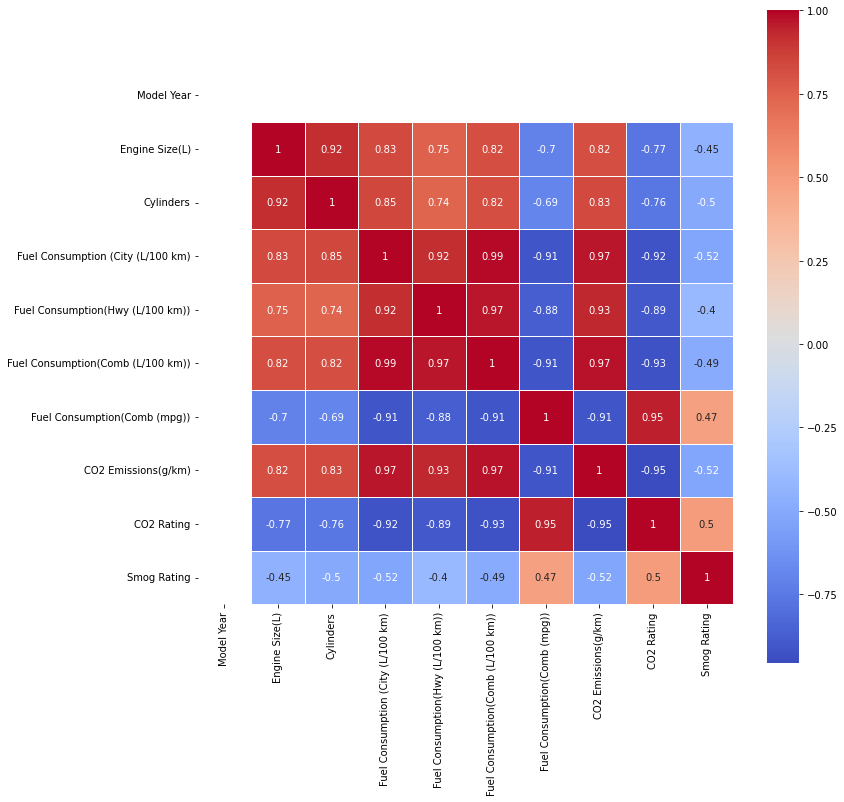

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(data=dados.corr(),annot=True, linewidths=0.5, cmap='coolwarm', square=True);

## Importando e preparando o modelo

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score as R2

###### Foram desconsiderados os valores mais próximos de uma correlação perfeita, respeitando a não multicolinearidade

In [17]:
var_pred=['Smog Rating', 'Engine Size(L)', 'Cylinders']

In [18]:
x=dados[var_pred]
y=dados['CO2 Emissions(g/km)']

In [19]:
x=x.dropna()
y=y.dropna()

In [20]:
modelo=LinearRegression()

#### Preparando a validação

In [21]:
from sklearn.model_selection import train_test_split as tts

In [22]:
# ?tts

In [23]:
np.random.seed(0)
x_treino,  x_valid, y_treino, y_valid = tts(x, y, test_size=0.5)
x_treino.shape, x_valid.shape, y_treino.shape, y_valid.shape

((473, 3), (473, 3), (473,), (473,))

In [24]:
modelo.fit(x_treino, y_treino)

LinearRegression()

In [25]:
modelo.coef_

array([-6.68631736, 17.16572155, 14.16287765])

In [26]:
predic=modelo.predict(x_valid)

In [27]:
mean_squared_error(y_valid, predic)

1110.6537685249048

In [28]:
R2(y_valid, predic)

0.7199649717565966